# Tutorial Pandas: Menangani Missing Data

Selamat datang di tutorial tentang penanganan missing data menggunakan Pandas! Dalam tutorial ini, kita akan mempelajari berbagai teknik untuk mendeteksi, menganalisis, dan menangani data yang hilang (missing data) dalam dataset.

## Daftar Isi:
1. Pengenalan Missing Data
2. Import Library dan Persiapan Data
3. Mendeteksi Missing Data
4. Teknik Penanganan Missing Data
   - Menghapus Data (Dropping)
   - Mengisi Data (Imputation)
   - Interpolasi
5. Studi Kasus
6. Latihan

Mari kita mulai!

## 1. Import Library dan Persiapan Data

Pertama, kita akan mengimport library yang diperlukan dan membuat dataset contoh yang mengandung missing data. Dataset ini akan merepresentasikan data penjualan toko online dengan beberapa nilai yang hilang.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed untuk reproduktifitas
np.random.seed(42)

# Membuat dataset contoh dengan missing values
n = 20
data = {
    'ID_Produk': [f'P{str(i).zfill(3)}' for i in range(n)],
    'Nama_Produk': [f'Produk_{i}' for i in range(n)],
    'Kategori': np.random.choice(['Elektronik', 'Fashion', 'Makanan', None], n),
    'Harga': np.random.uniform(50000, 1000000, n).round(2),
    'Stok': np.random.choice([np.nan] + list(range(10, 101, 10)), n),
    'Rating': np.random.choice([np.nan] + list(np.arange(1, 5.1, 0.5)), n),
    'Jumlah_Review': np.random.choice([None] + list(range(0, 101)), n)
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Tampilkan dataset
print("Dataset Penjualan Toko Online:")
print("-" * 50)
print(df)

# Informasi tentang dataset
print("\nInformasi Dataset:")
print("-" * 50)
print(df.info())

Dataset Penjualan Toko Online:
--------------------------------------------------
   ID_Produk Nama_Produk    Kategori      Harga  Stok  Rating Jumlah_Review
0       P000    Produk_0     Makanan   69555.27  20.0     1.0            51
1       P001    Produk_1        None  971414.36  60.0     4.0            22
2       P002    Produk_2  Elektronik  840820.51  40.0     2.0            24
3       P003    Produk_3     Makanan  251722.16  80.0     1.0            87
4       P004    Produk_4     Makanan  222733.72  60.0     3.0            58
5       P005    Produk_5        None  224234.28  10.0     3.0            39
6       P006    Produk_6  Elektronik  339030.13  30.0     5.0            27
7       P007    Produk_7  Elektronik  548518.61  80.0     2.0            13
8       P008    Produk_8     Makanan  460347.77  10.0     3.0            43
9       P009    Produk_9     Fashion  326667.68  90.0     1.0            63
10      P010   Produk_10     Makanan  631260.25  80.0     5.0            87
11    

## 2. Mendeteksi Missing Data

Pandas menyediakan beberapa metode untuk mendeteksi missing data dalam DataFrame. Mari kita pelajari cara-cara untuk mengidentifikasi dan menganalisis data yang hilang:

Lokasi Missing Values:
--------------------------------------------------
    ID_Produk  Nama_Produk  Kategori  Harga   Stok  Rating  Jumlah_Review
0       False        False     False  False  False   False          False
1       False        False      True  False  False   False          False
2       False        False     False  False  False   False          False
3       False        False     False  False  False   False          False
4       False        False     False  False  False   False          False
5       False        False      True  False  False   False          False
6       False        False     False  False  False   False          False
7       False        False     False  False  False   False          False
8       False        False     False  False  False   False          False
9       False        False     False  False  False   False          False
10      False        False     False  False  False   False          False
11      False        False     False  

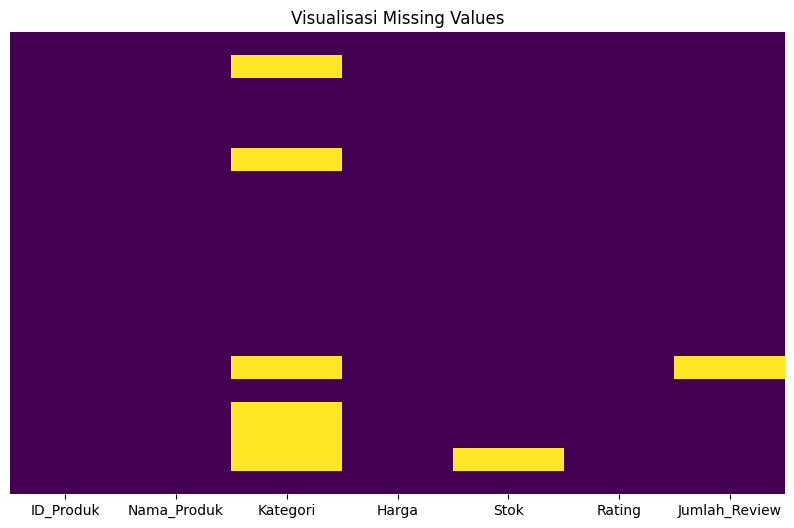

In [2]:
# 1. Mengecek missing values dengan isnull()
print("Lokasi Missing Values:")
print("-" * 50)
print(df.isnull())

# 2. Menghitung jumlah missing values per kolom
print("\nJumlah Missing Values per Kolom:")
print("-" * 50)
print(df.isnull().sum())

# 3. Menghitung persentase missing values per kolom
print("\nPersentase Missing Values per Kolom:")
print("-" * 50)
print((df.isnull().sum() / len(df) * 100).round(2), "%")

# 4. Visualisasi missing values menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Values')
plt.show()

## 3. Teknik Penanganan Missing Data

Ada beberapa teknik umum untuk menangani missing data:

1. **Dropping (Menghapus)**
   - Menghapus baris dengan missing values
   - Menghapus kolom dengan missing values

2. **Imputation (Mengisi)**
   - Mengisi dengan nilai statistik (mean, median, mode)
   - Mengisi dengan nilai tetap
   - Mengisi dengan nilai prediksi

3. **Interpolation (Interpolasi)**
   - Linear interpolation
   - Polynomial interpolation
   - Time series interpolation

Mari kita coba masing-masing teknik tersebut:

In [3]:
# 1. Teknik Dropping

# a. Menghapus baris dengan missing values
df_drop_rows = df.dropna()
print("Dataset setelah menghapus baris dengan missing values:")
print("-" * 50)
print(df_drop_rows)

# b. Menghapus kolom dengan missing values
df_drop_cols = df.dropna(axis=1)
print("\nDataset setelah menghapus kolom dengan missing values:")
print("-" * 50)
print(df_drop_cols)

# 2. Teknik Imputation

# a. Mengisi dengan mean untuk kolom numerik
df_mean = df.copy()
df_mean['Stok'] = df_mean['Stok'].fillna(df_mean['Stok'].mean())
print("\nMengisi missing values dengan mean pada kolom Stok:")
print("-" * 50)
print(df_mean['Stok'])

# b. Mengisi dengan mode untuk kolom kategorikal
df_mode = df.copy()
df_mode['Kategori'] = df_mode['Kategori'].fillna(df_mode['Kategori'].mode()[0])
print("\nMengisi missing values dengan mode pada kolom Kategori:")
print("-" * 50)
print(df_mode['Kategori'])

# 3. Teknik Interpolasi

# a. Linear interpolation untuk kolom numerik
df_interp = df.copy()
df_interp['Stok'] = df_interp['Stok'].interpolate(method='linear')
print("\nMengisi missing values dengan interpolasi linear pada kolom Stok:")
print("-" * 50)
print(df_interp['Stok'])

Dataset setelah menghapus baris dengan missing values:
--------------------------------------------------
   ID_Produk Nama_Produk    Kategori      Harga  Stok  Rating Jumlah_Review
0       P000    Produk_0     Makanan   69555.27  20.0     1.0            51
2       P002    Produk_2  Elektronik  840820.51  40.0     2.0            24
3       P003    Produk_3     Makanan  251722.16  80.0     1.0            87
4       P004    Produk_4     Makanan  222733.72  60.0     3.0            58
6       P006    Produk_6  Elektronik  339030.13  30.0     5.0            27
7       P007    Produk_7  Elektronik  548518.61  80.0     2.0            13
8       P008    Produk_8     Makanan  460347.77  10.0     3.0            43
9       P009    Produk_9     Fashion  326667.68  90.0     1.0            63
10      P010   Produk_10     Makanan  631260.25  80.0     5.0            87
11      P011   Produk_11     Makanan  182519.17  90.0     1.0            69
12      P012   Produk_12     Makanan  327537.42  40.0     

## 4. Studi Kasus: Analisis Penjualan

Mari kita coba menerapkan teknik penanganan missing data dalam konteks analisis penjualan. Kita akan:
1. Membersihkan data
2. Menganalisis tren penjualan per kategori
3. Menghitung rata-rata rating produk

Pertama, kita akan membuat salinan dataset dan menerapkan teknik yang sesuai untuk setiap jenis missing data:

Analisis per Kategori:
--------------------------------------------------
                Harga   Stok  Rating  Jumlah_Review
Kategori                                           
Elektronik  631071.60  210.0    3.12             70
Fashion     326667.68   90.0    1.00             63
Makanan     380517.95  650.0    2.93            784


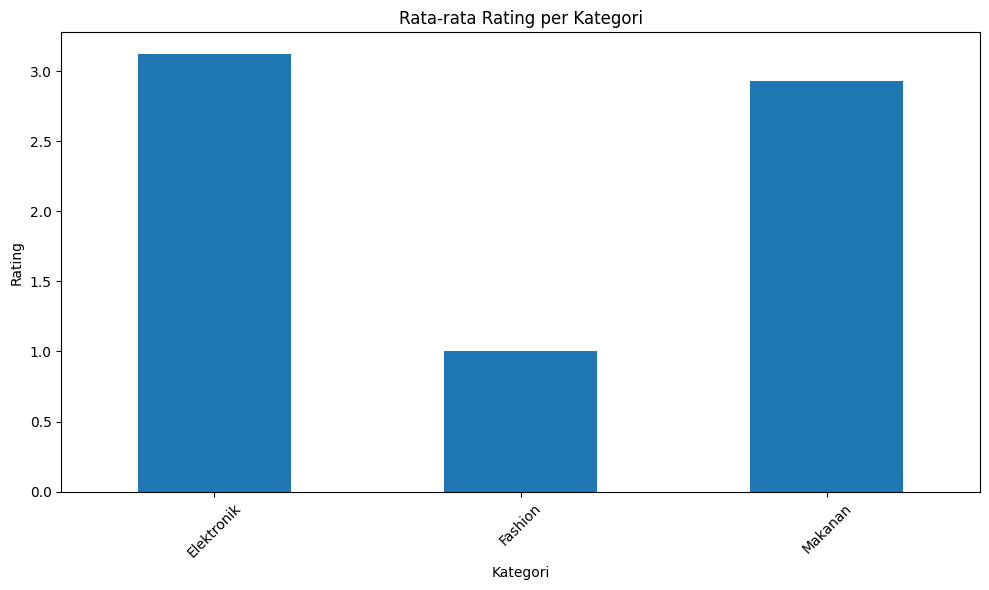

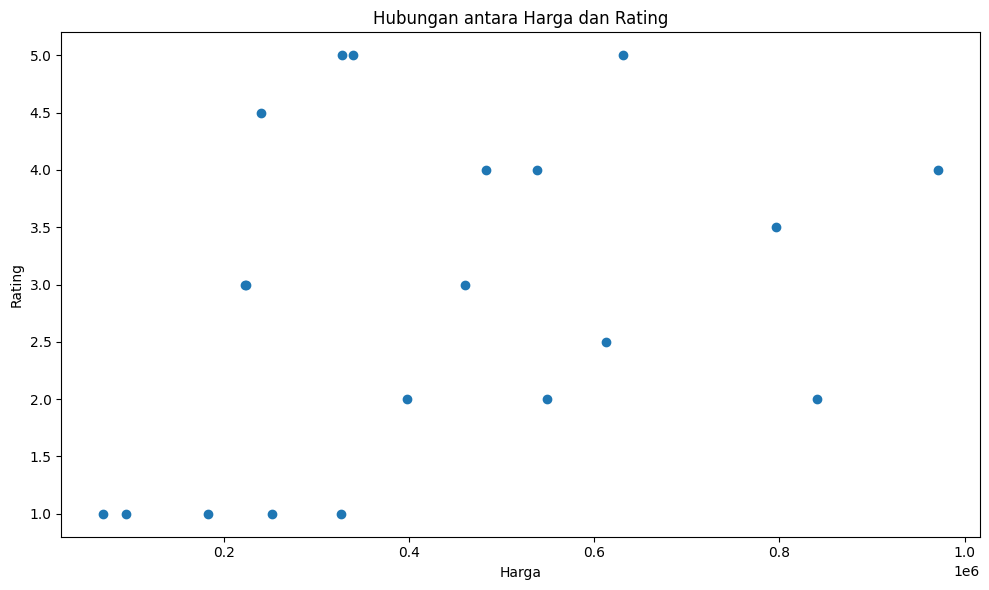

In [4]:
# Membuat salinan dataset
df_clean = df.copy()

# 1. Membersihkan data
# - Mengisi missing values kategori dengan mode
df_clean['Kategori'] = df_clean['Kategori'].fillna(df_clean['Kategori'].mode()[0])
# - Mengisi missing values stok dengan median
df_clean['Stok'] = df_clean['Stok'].fillna(df_clean['Stok'].median())
# - Mengisi missing values jumlah review dengan 0
df_clean['Jumlah_Review'] = df_clean['Jumlah_Review'].fillna('0')
df_clean['Jumlah_Review'] = pd.to_numeric(df_clean['Jumlah_Review'])

# 2. Analisis per kategori
print("Analisis per Kategori:")
print("-" * 50)
analisis_kategori = df_clean.groupby('Kategori').agg({
    'Harga': 'mean',
    'Stok': 'sum',
    'Rating': 'mean',
    'Jumlah_Review': 'sum'
}).round(2)
print(analisis_kategori)

# 3. Visualisasi rata-rata rating per kategori
plt.figure(figsize=(10, 6))
analisis_kategori['Rating'].plot(kind='bar')
plt.title('Rata-rata Rating per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Korelasi antara harga dan rating
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Harga'], df_clean['Rating'])
plt.title('Hubungan antara Harga dan Rating')
plt.xlabel('Harga')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

## 5. Latihan

Gunakan dataset yang telah kita buat untuk menyelesaikan soal-soal berikut:

1. Hitung persentase missing values untuk setiap kolom dan visualisasikan hasilnya menggunakan bar plot
2. Bandingkan hasil analisis menggunakan berbagai teknik penanganan missing values:
   - Dropping
   - Mean imputation
   - Median imputation
   - Mode imputation
3. Buat fungsi untuk mendeteksi outlier dalam data numerik dan handle missing values berdasarkan hasil deteksi tersebut
4. Analisis apakah ada pola tertentu dalam kemunculan missing values (apakah random atau ada pola tertentu)
5. Implementasikan teknik forward fill dan backward fill untuk missing values, kemudian bandingkan hasilnya

Berikut adalah template kode untuk memulai latihan:

In [5]:
# Template untuk latihan

# Soal 1: Visualisasi persentase missing values
def visualize_missing_percentage(df):
    # Lengkapi kode di sini...
    pass

# Soal 2: Perbandingan teknik handling missing values
def compare_missing_value_techniques(df):
    # Lengkapi kode di sini...
    pass

# Soal 3: Deteksi outlier dan handling missing values
def handle_missing_with_outlier_detection(df):
    # Lengkapi kode di sini...
    pass

# Soal 4: Analisis pola missing values
def analyze_missing_pattern(df):
    # Lengkapi kode di sini...
    pass

# Soal 5: Forward fill dan backward fill
def compare_fill_methods(df):
    # Lengkapi kode di sini...
    pass

# Jalankan fungsi-fungsi di atas dengan dataset kita
# visualize_missing_percentage(df)
# compare_missing_value_techniques(df)
# handle_missing_with_outlier_detection(df)
# analyze_missing_pattern(df)
# compare_fill_methods(df)